# Manthan Bendkhale

#### The Sparks Foundation

#### Data Science & Business Analytics Intern  

#### Task-2 : Prediction Using Unsupervised ML

##### Importing Libraries and Loading Dataset

In [6]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import yellowbrick as yb
plt.style.use('ggplot')

In [7]:
cd Task-2/ 

C:\Users\manth\Task-2


In [8]:
t2 = pd.read_csv("Iris.csv")

In [9]:
t2.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


##### Exploratory Data Analysis

In [10]:
t2.shape

(150, 6)

In [11]:
t2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [12]:
t2.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


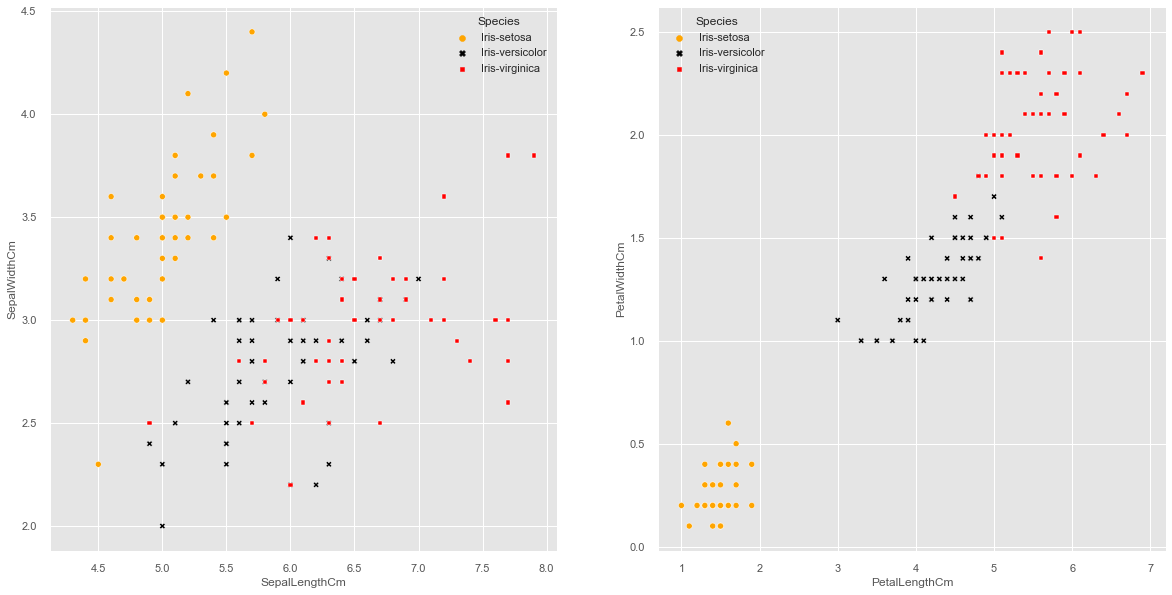

In [14]:
fig, ax = plt.subplots(figsize=(20,10))
plt.subplot(1,2,1)
sns.scatterplot(x = t2.SepalLengthCm, y =  t2.SepalWidthCm,
                hue = t2.Species, style = t2.Species, palette=['orange', 'black', 'red']);

plt.subplot(1,2,2)
sns.scatterplot(x = t2.PetalLengthCm, y =  t2.PetalWidthCm,
                hue = t2.Species, style = t2.Species, palette=['orange', 'black', 'red']);

##### Using the dendogram to find the actual number of clusters

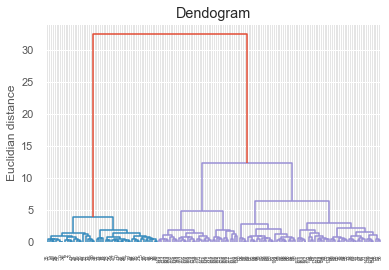

In [15]:
X = t2.iloc[:, [1, 2, 3,4]].values

import scipy.cluster.hierarchy as sch
dendogram = sch.dendrogram(sch.linkage(X, method = 'ward')) #ward- minimising the variants of each of the clusters
plt.title('Dendogram')
plt.ylabel('Euclidian distance')
plt.show()

##### In Dendograms, to find the number of clusters, we see the Longest Vertical distance between two horizonatal lines. Clearly here it indicates the number of CLusters should be 2, which is not true, therefore Dendograms is not a good way of finding Clusters here. So we will further move with some other Technique

##### Fitting the Elbow Method to find the actual number of clusters

D:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


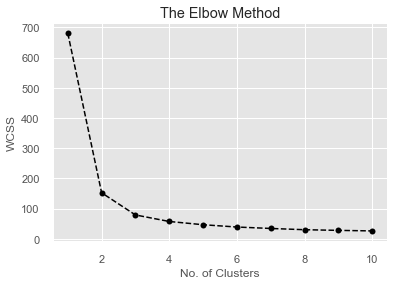

In [16]:
from  sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss, color= 'black',ls= "--",marker = "o")
plt.title('The Elbow Method')
plt.xlabel('No. of Clusters')
plt.ylabel('WCSS')
plt.show()

##### In the Elbow method the number of Cluster prediction is true. So this Technique indiactes a number of Clusters=3

##### Model Development with K-Means Clustering

In [17]:
# fitting k_means to teh dataset
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)

##### Visualising the Clusters

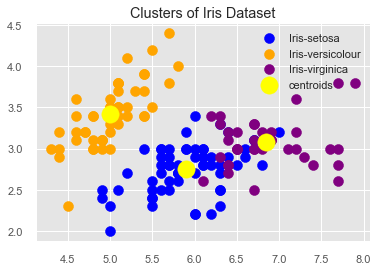

In [18]:
plt.scatter(X[y_kmeans == 0, 0],  X[y_kmeans == 0, 1], s= 100, c = 'blue', label = 'Iris-setosa')
plt.scatter(X[y_kmeans == 1, 0],  X[y_kmeans == 1, 1], s= 100, c = 'orange', label = 'Iris-versicolour')
plt.scatter(X[y_kmeans == 2, 0],  X[y_kmeans == 2, 1], s= 100, c = 'purple', label = 'Iris-virginica')

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s= 300, c = 'yellow', label = 'centroids')
plt.title('Clusters of Iris Dataset')
plt.legend()
plt.show()

##### Further K-Means with the Elbow method did an amazing job at predicting the number of true Clusters which is 3. The above visualization is the clustered graph

#####  

### Thank You!